---
# **MAPAS DE OCORRÊNCIA DE GRANIZO EM MG**
---
- `Dados`: Dados provenientes da Plataforma de Registros de Tempo Severo (PRETS): https://www.prevots.org
- `Código realizado por`: Enrique V. Mattos -- 21/05/2024 - enrique@unifei.edu.br
---

# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando salem
!pip install -q salem==0.3.9

# Instalando rasterio, pyproj e geopandas
!pip install -q rasterio pyproj geopandas

# Instalando cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.4
Uninstalling shapely-2.0.4:
  Successfully uninstalled shapely-2.0.4


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

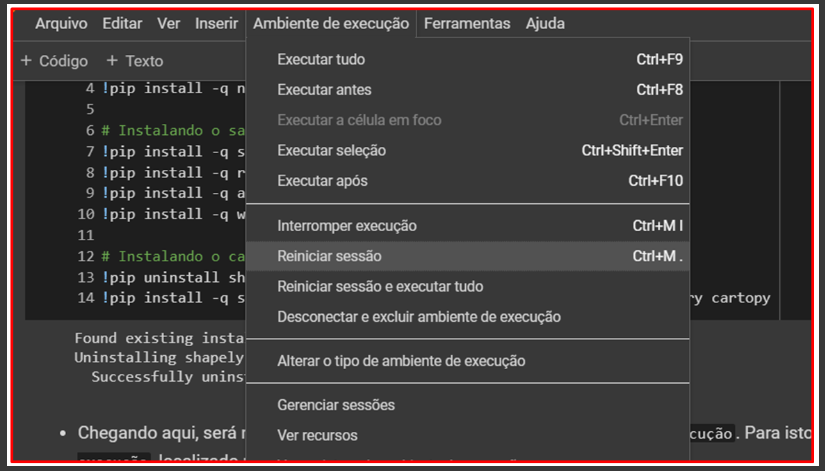

# **2° Passo:** Importando bibliotecas

In [2]:
import proplot as pplt                      # Biblioteca para gerar figuras
import pandas as pd                         # Biblioteca para ler arquivos tabulares
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **3° Passo:** Monta drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_JHONATAN/'

Mounted at /content/drive


# **4° Passo:** Declarando funções

In [4]:
#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# **PARTE 1):** Leitura da planilha excell e organização dos dados

In [5]:
#============================================================================================================#
#                                     Limites do estado de MG
#============================================================================================================#
lonmin = -51.1
lonmax = -39.8
latmin = -23.0
latmax = -14.1

#============================================================================================================#
#                                    Lendo os arquivos de cada ano
#============================================================================================================#
df_2018 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2018')
df_2019 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2019')
df_2020 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2020')
df_2021 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2021')
df_2022 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2022')
df_2023 = pd.read_excel(f'{dir}input/Dados Novos.xlsx', sheet_name='2023')

#============================================================================================================#
#                                Renomeia os nomes das colunas
#============================================================================================================#
# renomeia as colunas: 2018
df_2018.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q\n(1,\n2, 3)':'q',
                        'Ano':'ano',
                        'Mês':'mes',
                        'Dia':'dia',
                        'hh(UTC)': 'hora',
                        'mm': 'minuto',
                        'INCERTEZA\nNO HORÁRIO\n(+-MINUTOS)':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCERTEZA\nNA LOCALI\nZAÇÃO (km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade',
                        'EST\nADO':'UF',
                        'TIPO \n(GRA,\nVEN,\nTOR)':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# renomeia as colunas: 2019
df_2019.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q\n(1,\n2, 3)':'q',
                        'Ano':'ano',
                        'Mês':'mes',
                        'Dia':'dia',
                        'hh(UTC)': 'hora',
                        '\nmm': 'minuto',
                        'INCERTEZA\nNO HORÁRIO\n(+-MINUTOS)':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCERTEZA\nNA LOCALI\nZAÇÃO (km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade',
                        'EST\nADO':'UF',
                        'TIPO \n(GRA,\nVEN,\nTOR)':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# renomeia as colunas: 2020
df_2020.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q\n(1,\n2, 3)':'q',
                        'Ano':'ano',
                        'Mês':'mes',
                        'Dia':'dia',
                        'hh(UTC)': 'hora',
                        'mm\n': 'minuto',
                        'INCERTEZA\nNO HORÁRIO\n(+-MINUTOS)':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCERTEZA\nNA LOCALI\nZAÇÃO (km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade',
                        'EST\nADO':'UF',
                        'TIPO \n(GRA,\nVEN,\nTOR)':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# elimina as últimas colunas
df_2020.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis=1, inplace=True)

# renomeia as colunas: 2021
df_2021.rename(columns={'VERIFI\nCADO?':'verificado',
                        'Q:\n1\n2\nou\n3':'q',
                        'Ano':'ano',
                        'Mês':'mes',
                        'Dia':'dia',
                        'hh(UTC)': 'hora',
                        'mm': 'minuto',
                        'INCER-\nTEZA NO\nHORÁRIO\nMINUTOS':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km)':'incerteza_loc',
                        'MUNICÍPIO':'cidade',
                        'ES\nTA\nDO':'UF',
                        'TIPO: \nGRA\nVEN\nOU\nTOR':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# renomeia as colunas: 2022
df_2022.rename(columns={'verifi\ncado?':'verificado',
                        'Q:\n1\n2\nou\n3':'q',
                        'Ano':'ano',
                        'Mês':'mes',
                        'Dia':'dia',
                        '\nhh(UTC)': 'hora',
                        'mm': 'minuto',
                        'INCER-\nTEZA NO\nHORÁRIO\nMINUTOS':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km)':'incerteza_loc',
                        'Município':'cidade',
                        'ES\nTA\nDO':'UF',
                        'TIPO: \nGRA\nVEN\nOU\nTOR':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

# renomeia as colunas: 2023
df_2023.rename(columns={'verifi\ncado?':'verificado',
                        'Q:\n1\n2\nou\n3':'q',
                        'Ano':'ano',
                        'mês':'mes',
                        'Dia':'dia',
                        '\nhh(UTC)': 'hora',
                        'mm': 'minuto',
                        'INCER-\nTEZA NO\nHORÁRIO\nMINUTOS':'incerteza_hormin',
                        'lat':'lat',
                        'lon':'lon',
                        'INCER-\nTEZA NA\nLOCALI-\nZAÇÃO \n(km)':'incerteza_loc',
                        'Município':'cidade',
                        'ES\nTA\nDO':'UF',
                        'TIPO: \nGRA\nVEN\nOU\nTOR':'tipo',
                        'INTEN-\nSIDADE\n(cm OU\n km/h)':'intensidade',
                        'DESCRIÇÃO':'descricao'},
                        inplace=True)

#============================================================================================================#
#                                       Concatena as planilhas
#============================================================================================================#
df_2018_2023 = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

#============================================================================================================#
#                                 Transformando a data em index do dataframe
#============================================================================================================#
# criando a coluna "data" e transformando em formato Datetime
dfx = df_2018_2023[['ano', 'mes','dia','hora','minuto']]

dfx = dfx.rename(columns={'ano':'year', 'mes':'month', 'dia':'day', 'hora':'hour', 'minuto':'minute'})

df_2018_2023['data'] = pd.to_datetime(dfx)

# seta a 'data' como índice da tabela
df_2018_2023.set_index('data', inplace=True)

#============================================================================================================#
#                                   Mostra a tabela com todos os anos
#============================================================================================================#
df_2018_2023

,verificado,q,ano,mes,dia,hora,minuto,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
data,,,,,,,,,,,,,,,,
2018-07-10 20:55:00,SIM,0,2018,7,10,20,55.0,0,-21.3093,-42.8626,0.0,Astolfo Dutra,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...
2018-07-10 21:05:00,SIM,0,2018,7,10,21,5.0,0,-21.3164,-42.8131,0.0,Dona Euzébia,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...
2018-07-10 21:20:00,SIM,0,2018,7,10,21,20.0,0,-21.2960,-42.7278,0.0,Cataguases,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...
2018-08-01 23:20:00,SIM,0,2018,8,1,23,20.0,0,-20.1100,-43.0500,0.0,Alvinópolis,MG,GRA,0.0,Relato da Defesa Civil de casas danificadas pe...
2018-08-02 18:15:00,SIM,0,2018,8,2,18,15.0,0,-20.7700,-46.2500,0.0,São José da Barra,MG,GRA,1.0,Tamanho estimado por fotos. Horário estimado p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-26 18:40:00,NaN,1,2023,10,26,18,40.0,20,-20.3885,-43.5035,4.0,Ouro Preto,MG,GRA,2.0,HorÃ¡rio estimado por radar. Tamanho estimado ...
2023-10-26 18:50:00,NaN,1,2023,10,26,18,50.0,30,-21.7906,-43.3473,1.0,Juiz de Fora,MG,GRA,1.5,HorÃ¡rio estimado por satÃ©lite. Granizo no ba...
2023-10-26 19:20:00,NaN,1,2023,10,26,19,20.0,20,-21.7207,-44.9885,0.5,SÃ£o TomÃ© das Letras,MG,GRA,2.0,HorÃ¡rio estimado por satÃ©lite. Tamanho estim...


# **PARTE 2):** `MAPA TOTAL`
- Somando todos os anos (2018-2023) - 6 anos

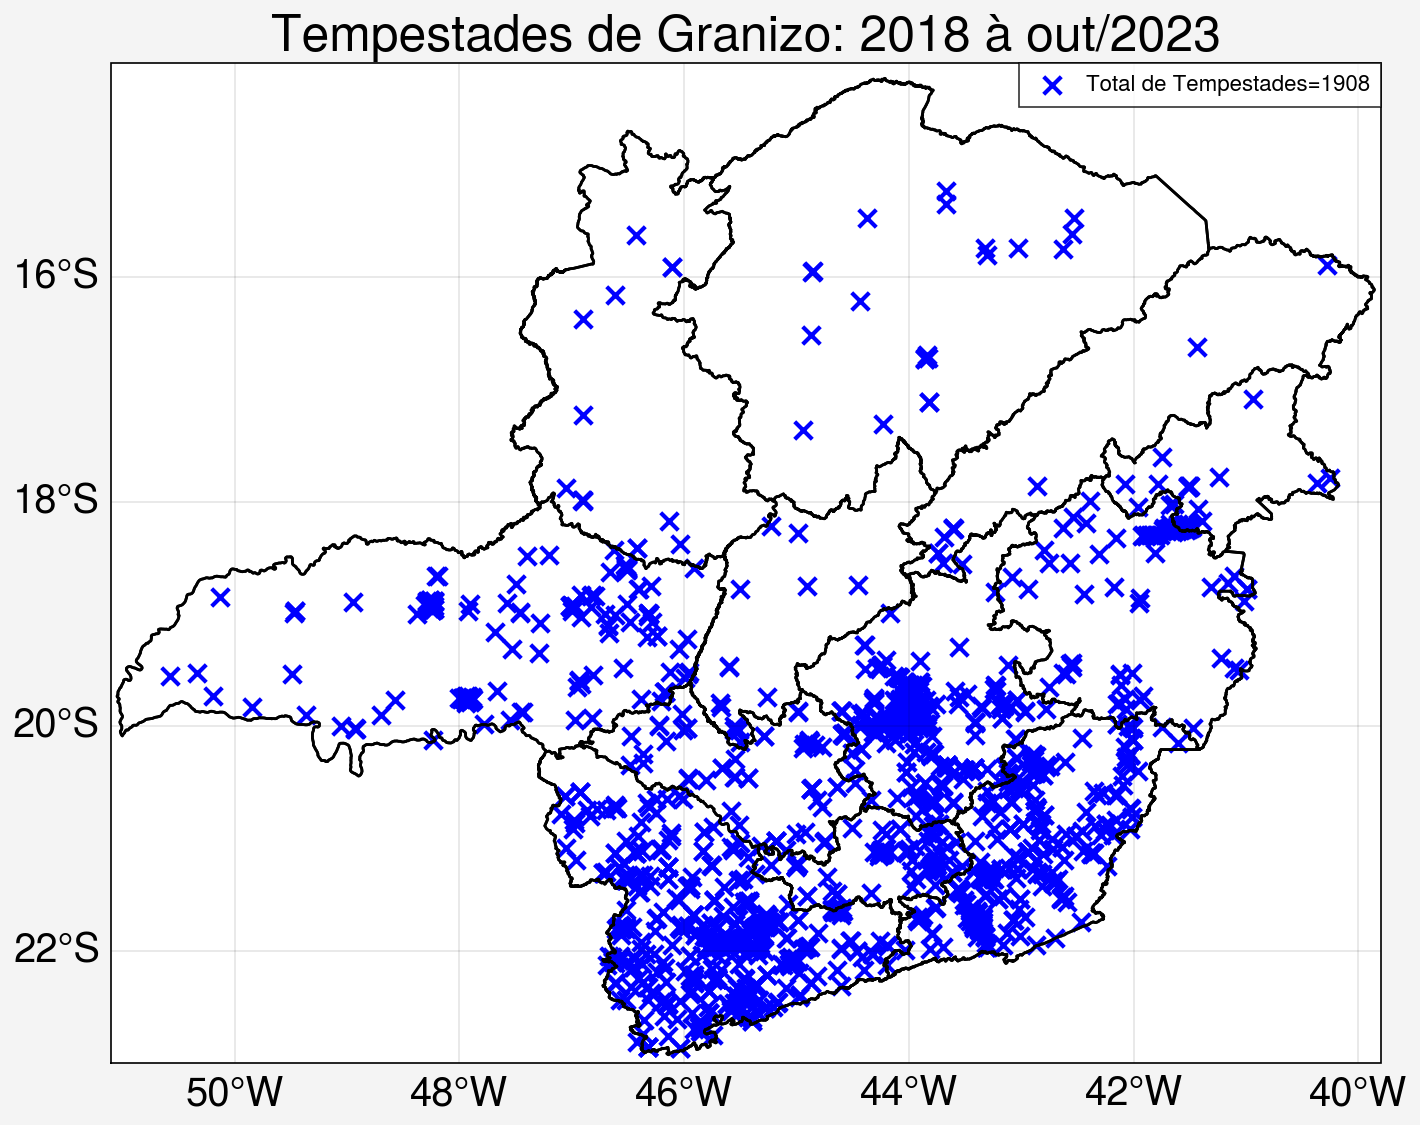

In [6]:
 # Cria a moldura da figura
fig, ax = pplt.subplots(axheight=5, tight=True, proj='pcarree')

# Cria o formato dos eixos da figura
ax.format(coast=False, borders=True, innerborders=False,
          labels=True,
          latlines=2, lonlines=2,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title=f'Tempestades de Granizo: 2018 à out/2023',
          small='20px', large='25px')

# Plota granizo
ax.scatter(df_2018_2023['lon'].values,
           df_2018_2023['lat'].values,
           transform=ccrs.PlateCarree(),
           marker='x', s=40, color='b',
           label=f'Total de Tempestades={df_2018_2023.shape[0]}')

# Plota contornos dos Estados
evm_plot_states(f'{dir}shapefiles/MG_UF_2019.shp')

# Plota contornos das Mesoregiões
evm_plot_states(f'{dir}shapefiles/MG_Mesorregioes_2020.shp')

# Adiciona legenda
ax.legend(ncol=1, prop={'size': 8}, frameon='False')

# Salva figura
fig.save(f'{dir}output/Fig_1_total_geral_2018_2023.png', bbox_inches='tight', dpi=300)

# Exibe figura na tela
pplt.show()

# **PARTE 2):** `MAPA POR ANO`
- Cada ano numa figura

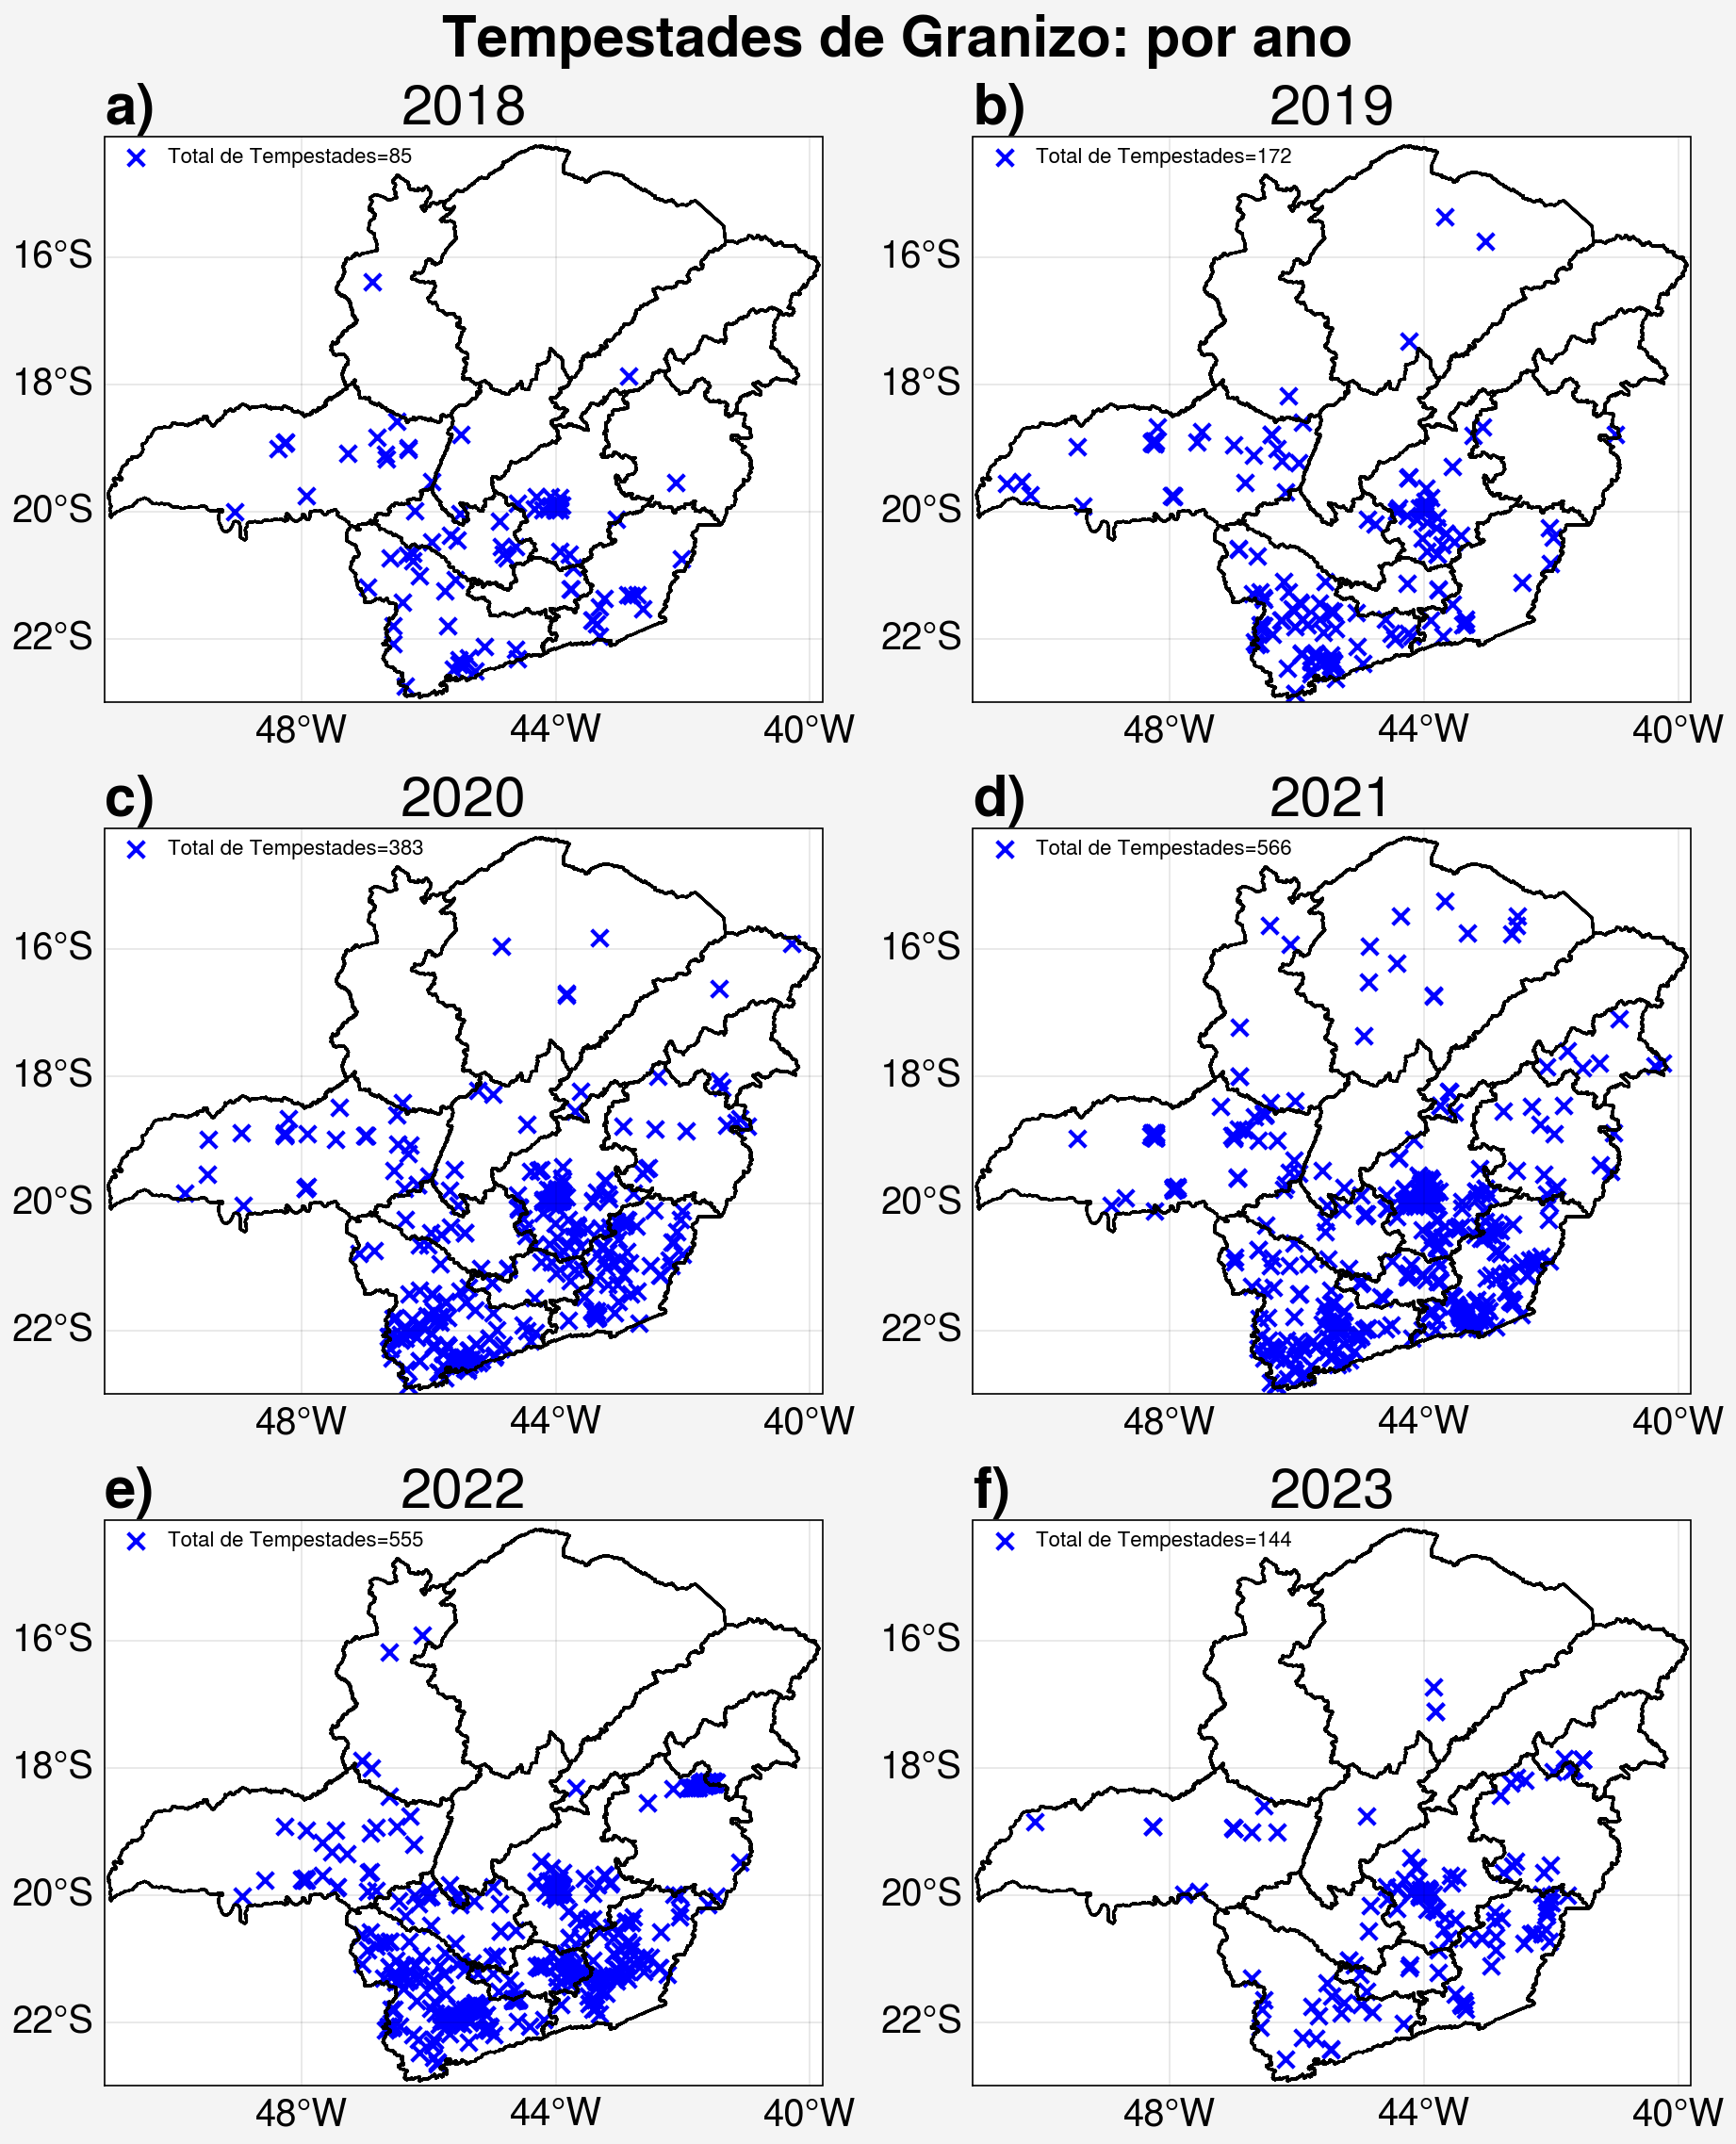

In [7]:
# nomes dos anos
anos = ['2018', '2019', '2020', '2021', '2022', '2023']

# cria a moldura da figura
fig, ax = pplt.subplots(ncols=2, nrows=3,  axheight=3, tight=True,
                        proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=2, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Tempestades de Granizo: por ano',
          abc=True, abcstyle='a)', abcsize=5,
          small='20px', large='30px')

# loop dos meses
for m, nome_ano in enumerate(anos):

    # ano: exemplo 2022'
    date = f'{nome_ano}' # 2018

    # seleciona os dados de um determinado mês
    df_ano = df_2018_2023.loc[date]

    # plota figura
    if m == 0:
        map1 = ax[m].scatter(df_ano['lon'].values, df_ano['lat'].values,
                             transform=ccrs.PlateCarree(),
                             marker='x', s=40, color='b',
                             label=f'Total de Tempestades={df_ano.shape[0]}')

    else:
        ax[m].scatter(df_ano['lon'].values, df_ano['lat'].values,
                      transform=ccrs.PlateCarree(),
                      marker='x', s=40, color='b',
                      label=f'Total de Tempestades={df_ano.shape[0]}')

    # Adiciona legenda
    ax[m].legend(ncol=1, prop={'size': 8}, loc='ul', frameon=False)

    # plota titulo de cada figura
    ax[m].format(title=f'{nome_ano}', labels=True)

    # plota contornos dos Estados
    evm_plot_states(f'{dir}shapefiles/MG_UF_2019.shp')

    # plota contornos das Mesoregiões
    evm_plot_states(f'{dir}shapefiles/MG_Mesorregioes_2020.shp')

# salva figura
fig.save(f'{dir}output/Fig_2_total_por_ano.png', dpi=300)

# **PARTE 3):** `MAPA POR MÊS`


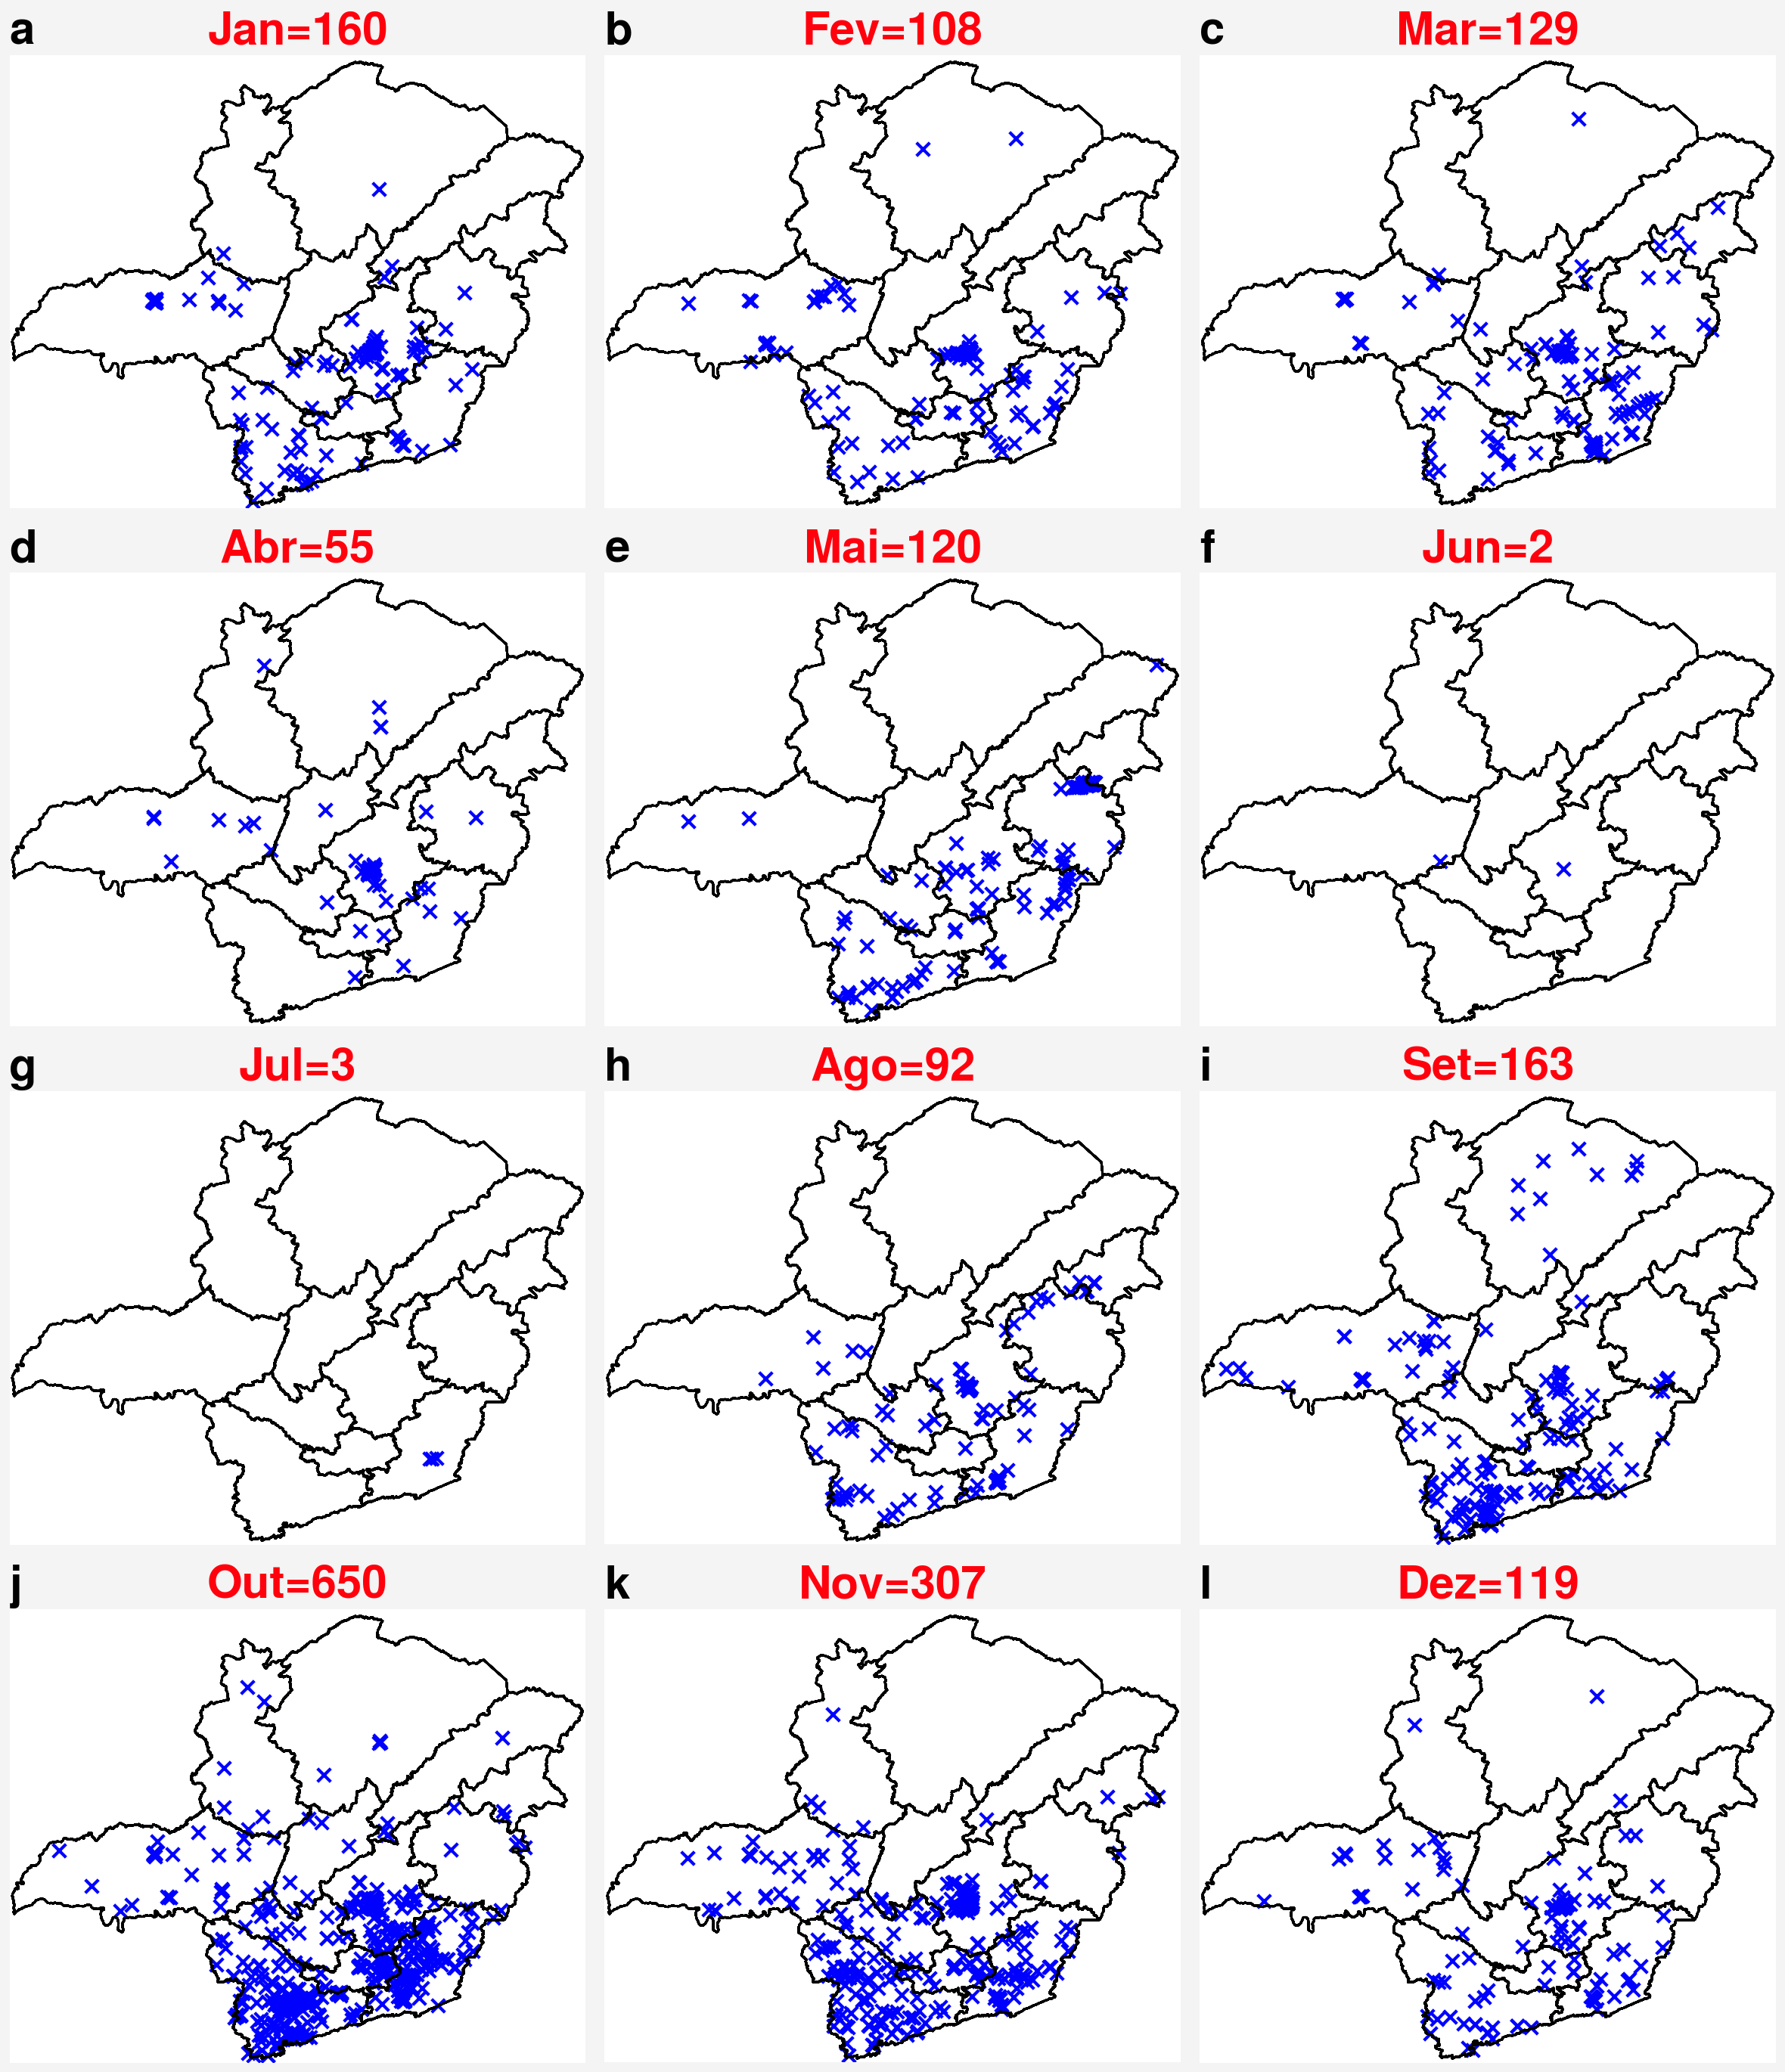

In [8]:
# nomes dos meses
#meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro','Dezembro']
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov','Dez']

# cria a moldura da figura
fig, ax = pplt.subplots(ncols=3, nrows=4, axheight=3, tight=True,
                        proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False,
          latlines=2, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          small='20px', large='30px',
          linewidth=0, grid=False, abc=False)

# loop dos meses
for m, nome_mes in enumerate(meses):

    # nome do mês
    mes = m+1 # Exemplo: 1

    # seleciona os dados de um determinado mês
    condicao = df_2018_2023['mes'] == mes
    df_mes = df_2018_2023[condicao]

    # plota figura
    if m == 0:
        map1 = ax[m].scatter(df_mes['lon'].values,
                             df_mes['lat'].values,
                             transform=ccrs.PlateCarree(),
                             marker='x', s=40, color='b')

    else:
        ax[m].scatter(df_mes['lon'].values,
                      df_mes['lat'].values,
                      transform=ccrs.PlateCarree(),
                      marker='x', s=40, color='b')

    # adiciona legenda
    #ax[m].legend(ncol=1, prop={'size': 6}, loc='ul', frameon=False)

    # plota título de cada figura
    ax[m].format(title=f'{nome_mes}={df_mes.shape[0]}', titleweight='bold', titlecolor='bright red')

    # plota contornos do estado
    evm_plot_states(f'{dir}shapefiles/MG_UF_2019.shp')

    # Plota contornos das mesoregiões
    evm_plot_states(f'{dir}shapefiles/MG_Mesorregioes_2020.shp')

# salva figura
fig.save(f'{dir}output/Fig_3_total_por_mes.png', dpi=300)

# **PARTE 4):** `POR MESOREGIÃO`

In [9]:
# shapefile das mesoregiões de MG
shapefile_mesoregioes_mg = gpd.read_file(f'{dir}shapefiles/MG_Mesorregioes_2020.shp')
shapefile_mesoregioes_mg

,CD_MESO,NM_MESO,SIGLA_UF,geometry
0,3101,Noroeste de Minas,MG,"POLYGON ((-46.80620 -15.87062, -46.80616 -15.8..."
1,3102,Norte de Minas,MG,"POLYGON ((-45.58606 -15.71840, -45.58587 -15.7..."
2,3103,Jequitinhonha,MG,"POLYGON ((-40.31316 -16.67865, -40.31402 -16.6..."
3,3104,Vale do Mucuri,MG,"POLYGON ((-41.35140 -17.34670, -41.35114 -17.3..."
4,3105,Triângulo Mineiro/Alto Paranaíba,MG,"POLYGON ((-47.67975 -18.35609, -47.67936 -18.3..."
5,3106,Central Mineira,MG,"POLYGON ((-45.63705 -18.79194, -45.63625 -18.7..."
6,3107,Metropolitana de Belo Horizonte,MG,"POLYGON ((-44.83849 -19.73535, -44.83915 -19.7..."
7,3108,Vale do Rio Doce,MG,"POLYGON ((-43.19958 -18.86045, -43.19984 -18.8..."
8,3109,Oeste de Minas,MG,"POLYGON ((-46.62613 -19.99392, -46.62591 -19.9..."
9,3110,Sul/Sudoeste de Minas,MG,"POLYGON ((-47.14786 -21.03546, -47.14806 -21.0..."


In [10]:
# nome das mesoregiões
mesoregioes = list(shapefile_mesoregioes_mg['NM_MESO'].values)
mesoregioes

['Noroeste de Minas',
 'Norte de Minas',
 'Jequitinhonha',
 'Vale do Mucuri',
 'Triângulo Mineiro/Alto Paranaíba',
 'Central Mineira',
 'Metropolitana de Belo Horizonte',
 'Vale do Rio Doce',
 'Oeste de Minas',
 'Sul/Sudoeste de Minas',
 'Campo das Vertentes',
 'Zona da Mata']

Cria o GeoDataframe com as tempestades selecionadas dentro do shapefile

In [11]:
df_2018_2023.head(2)

,verificado,q,ano,mes,dia,hora,minuto,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao
data,,,,,,,,,,,,,,,,
2018-07-10 20:55:00,SIM,0,2018,7,10,20,55.0,0,-21.3093,-42.8626,0.0,Astolfo Dutra,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...
2018-07-10 21:05:00,SIM,0,2018,7,10,21,5.0,0,-21.3164,-42.8131,0.0,Dona Euzébia,MG,GRA,0.0,Horário estimado pelo radar de Pico do Couto. ...


In [12]:
# Cria o GeoDataframe de storms
storms = zip(df_2018_2023['lon'], df_2018_2023['lat'])                                    # Variavel "storms' para jogarmos no loop de leitura
geometry = [Point(storms) for storms in zip(df_2018_2023['lon'], df_2018_2023['lat']) ]   # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_df_storms = gpd.GeoDataFrame(df_2018_2023, crs=crs, geometry=geometry)                # GeoDataFrame de storms

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
MG_mesoregioes = shapefile_mesoregioes_mg.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_storms = geo_df_storms.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Elimina dados fora da cidade
ind = MG_mesoregioes[ MG_mesoregioes['NM_MESO'] == 'Noroeste de Minas'].index
indice = ind[0]

geo_df_storms_selecionadas = geo_df_storms[ geo_df_storms['geometry'].within(MG_mesoregioes.iloc[indice].geometry) ]

display(geo_df_storms_selecionadas.head(2))
print(geo_df_storms_selecionadas.shape[0])

,verificado,q,ano,mes,dia,hora,minuto,incerteza_hormin,lat,lon,incerteza_loc,cidade,UF,tipo,intensidade,descricao,geometry
data,,,,,,,,,,,,,,,,,
2018-12-25 19:50:00,SIM,0,2018,12,25,19,50.0,0,-16.3720,-46.896,0.0,Unaí,MG,GRA,0.0,Horário estimado pelo radar de São Francisco. ...,POINT (297.492 8188.971)
2019-10-27 19:10:00,SIM,1,2019,10,27,19,10.0,10,-18.1749,-46.139,1.0,Presidente Olegário,MG,GRA,2.0,Horário estimado pelo radar de Três Marias. Ac...,POINT (379.535 7990.091)


14


In [13]:
# Cria o GeoDataframe de storms
storms = zip(df_2018_2023['lon'], df_2018_2023['lat'])                                         # Variavel "storms' para jogarmos no loop de leitura
geometry = [Point(storms) for storms in zip(df_2018_2023['lon'], df_2018_2023['lat']) ] # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_df_storms = gpd.GeoDataFrame(df_2018_2023, crs=crs, geometry=geometry)              # GeoDataFrame de storms

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
MG_mesoregioes = shapefile_mesoregioes_mg.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_storms = geo_df_storms.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# loop nas mesoregiões
storms_mesoregiao = []
for mesoregiao in mesoregioes:

    # elimina dados fora da cidade
    ind = MG_mesoregioes[ MG_mesoregioes['NM_MESO'] == mesoregiao].index
    indice = ind[0]

    geo_df_storms_selecionadas = geo_df_storms[ geo_df_storms['geometry'].within(MG_mesoregioes.iloc[indice].geometry) ]
    #display(geo_df_storms)

    # quantidade de storms para cada mesoregião
    storms_mesoregiao.append(geo_df_storms_selecionadas.shape[0])

    print('PROCESSANDO....>>>', mesoregiao, '/ storms=', geo_df_storms.shape[0], '/ indice=', indice)

PROCESSANDO....>>> Noroeste de Minas / storms= 1908 / indice= 0
PROCESSANDO....>>> Norte de Minas / storms= 1908 / indice= 1
PROCESSANDO....>>> Jequitinhonha / storms= 1908 / indice= 2
PROCESSANDO....>>> Vale do Mucuri / storms= 1908 / indice= 3
PROCESSANDO....>>> Triângulo Mineiro/Alto Paranaíba / storms= 1908 / indice= 4
PROCESSANDO....>>> Central Mineira / storms= 1908 / indice= 5
PROCESSANDO....>>> Metropolitana de Belo Horizonte / storms= 1908 / indice= 6
PROCESSANDO....>>> Vale do Rio Doce / storms= 1908 / indice= 7
PROCESSANDO....>>> Oeste de Minas / storms= 1908 / indice= 8
PROCESSANDO....>>> Sul/Sudoeste de Minas / storms= 1908 / indice= 9
PROCESSANDO....>>> Campo das Vertentes / storms= 1908 / indice= 10
PROCESSANDO....>>> Zona da Mata / storms= 1908 / indice= 11


In [14]:
print(mesoregioes,'\n')
print(storms_mesoregiao)

['Noroeste de Minas', 'Norte de Minas', 'Jequitinhonha', 'Vale do Mucuri', 'Triângulo Mineiro/Alto Paranaíba', 'Central Mineira', 'Metropolitana de Belo Horizonte', 'Vale do Rio Doce', 'Oeste de Minas', 'Sul/Sudoeste de Minas', 'Campo das Vertentes', 'Zona da Mata'] 

[14, 22, 11, 31, 190, 16, 494, 71, 63, 558, 106, 329]


In [15]:
# colocando os dados em um DataFrame
df_mesoregiao = pd.DataFrame({'mesoregiao': mesoregioes, 'storms': storms_mesoregiao})
df_mesoregiao

,mesoregiao,storms
0,Noroeste de Minas,14
1,Norte de Minas,22
2,Jequitinhonha,11
3,Vale do Mucuri,31
4,Triângulo Mineiro/Alto Paranaíba,190
5,Central Mineira,16
6,Metropolitana de Belo Horizonte,494
7,Vale do Rio Doce,71
8,Oeste de Minas,63
9,Sul/Sudoeste de Minas,558


In [16]:
df_mesoregiao.sort_values(by='storms', ascending=False)

,mesoregiao,storms
9,Sul/Sudoeste de Minas,558
6,Metropolitana de Belo Horizonte,494
11,Zona da Mata,329
4,Triângulo Mineiro/Alto Paranaíba,190
10,Campo das Vertentes,106
7,Vale do Rio Doce,71
8,Oeste de Minas,63
3,Vale do Mucuri,31
1,Norte de Minas,22
5,Central Mineira,16


In [17]:
df_mesoregiao2 = df_mesoregiao.sort_values(by='storms', ascending=True)

In [18]:
df_mesoregiao2['storms']

2      11
0      14
5      16
1      22
3      31
8      63
7      71
10    106
4     190
11    329
6     494
9     558
Name: storms, dtype: int64

In [19]:
df_mesoregiao2['storms'].sum()

1905

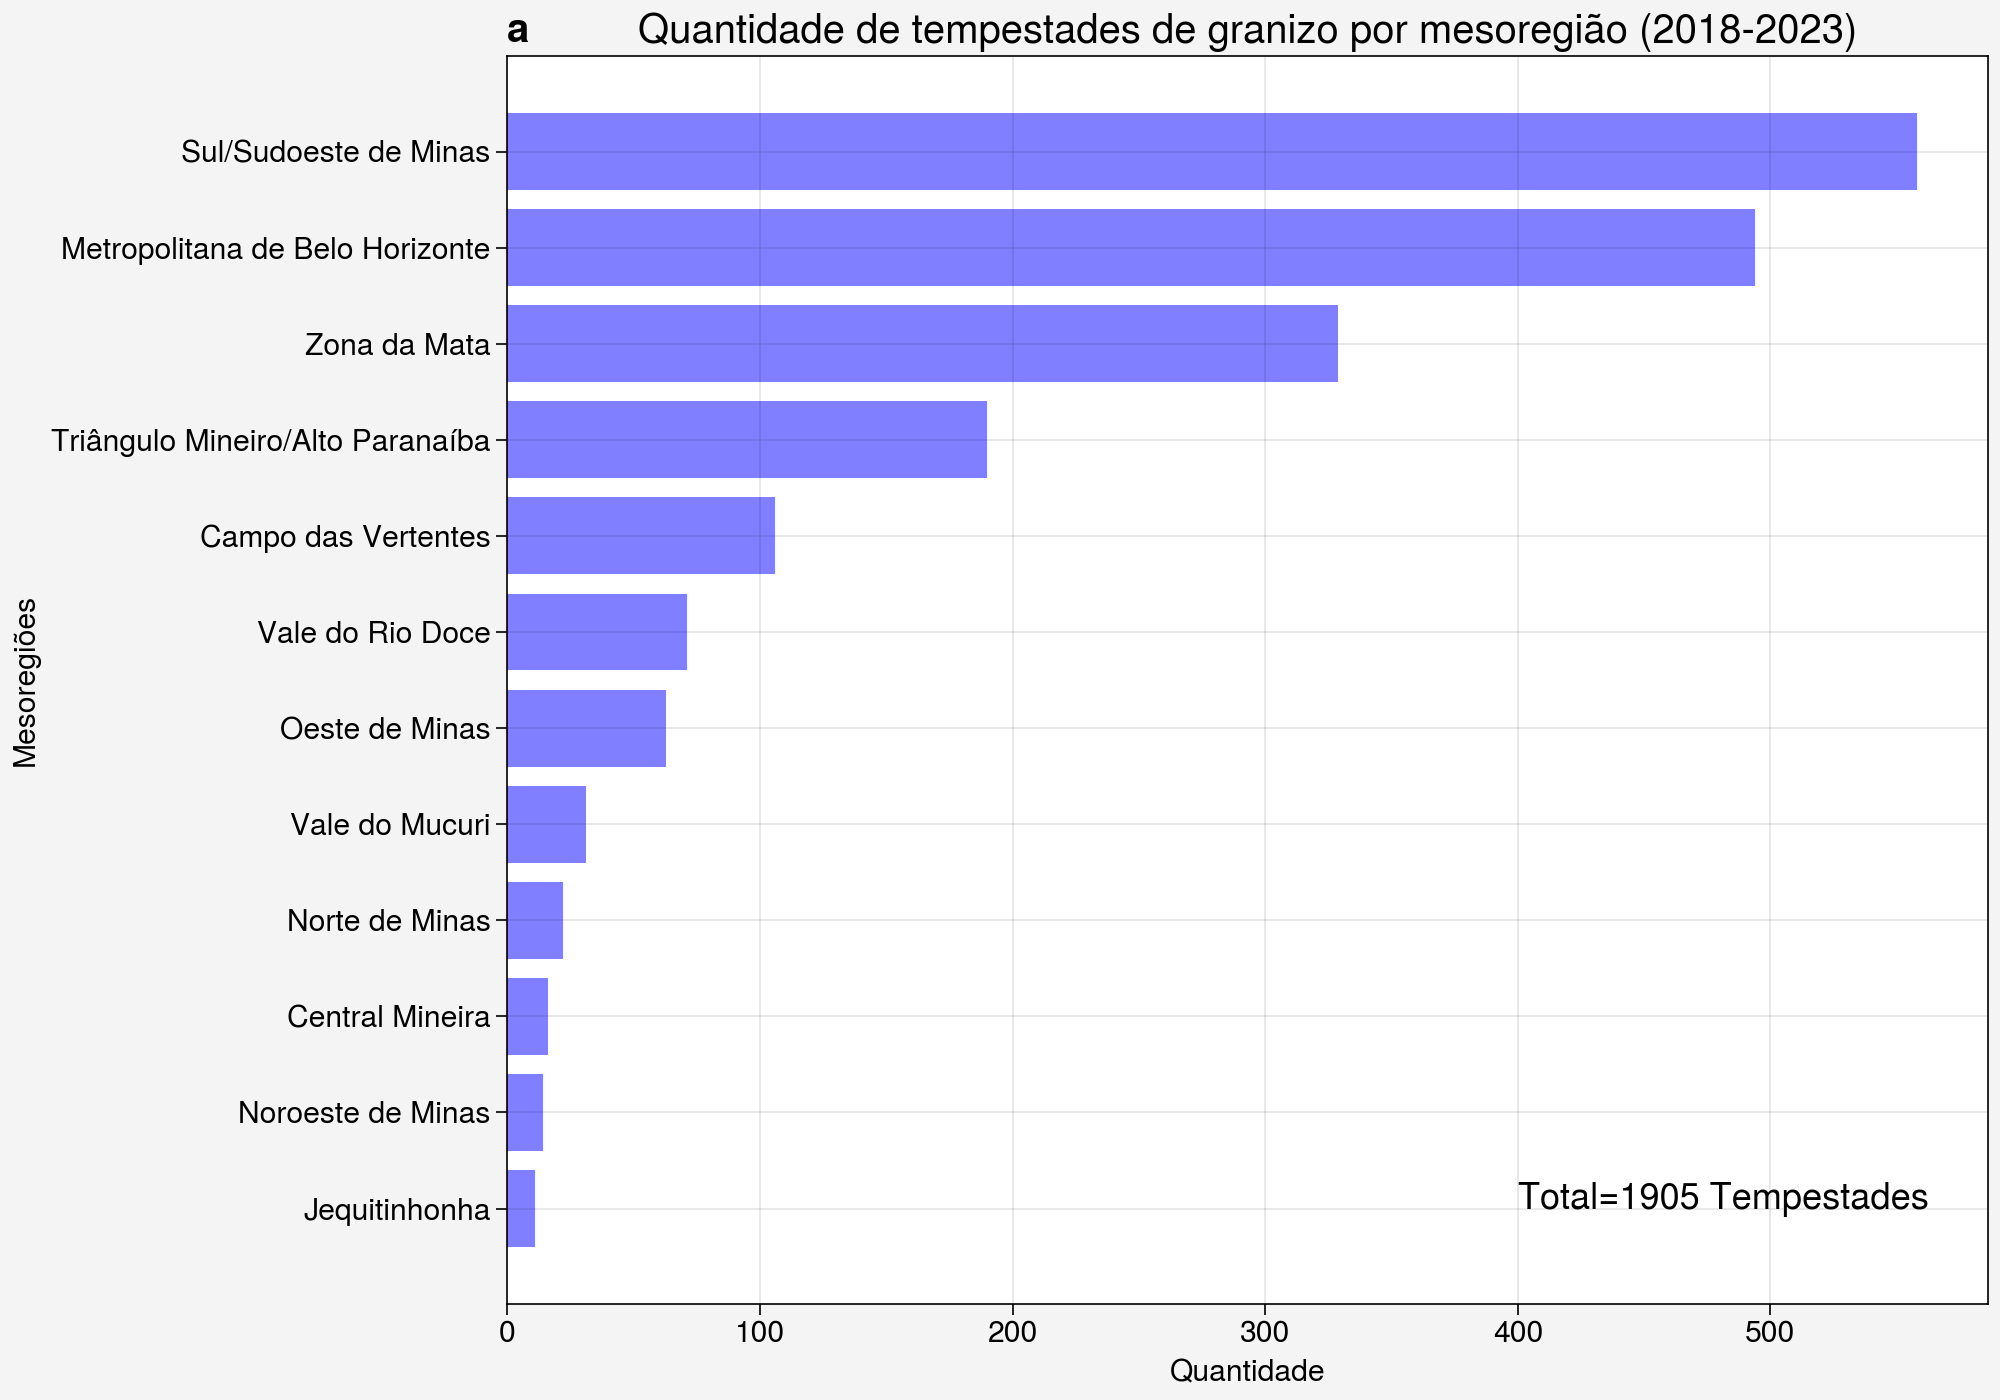

In [20]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 7), tight=True)

# plota gráfico de barras
ax.barh(df_mesoregiao2['mesoregiao'], df_mesoregiao2['storms'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title=f'Quantidade de tempestades de granizo por mesoregião (2018-2023)',
          xlabel='Quantidade', ylabel='Mesoregiões',
          small='15px', large='20px',
          xtickminor=False, ytickminor=False,
          xrotation=0,
          abc=False)

# legenda
tot = df_mesoregiao2["storms"].sum()
ax.annotate(f'Total={tot} Tempestades',
            xy=(400, 0),
            fontsize=13,
            color='black')

# salva figura
fig.save(f'{dir}output/Fig_4_total_por_mesoregiao.png', dpi=300)

# exibe figura na tela
pplt.show()